In [195]:
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
# CarEvaluation Data 불러오기
car_raw = pd.read_csv('C:/Users/HEO/HW1/car.csv')

In [208]:
# 첫 5행 살펴보기
car_raw.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [209]:
# 끝 5행 살펴보기
car_raw.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [210]:
# 각 변수 별 결측치가 있는지,
# 변수형이 numeric인지 nominal인지 알아보기
car_raw.info()

# 모든 변수의 data가 1728개로 결측치가 없고
# 모든 변수의 타입이 object이므로 모두 nominal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


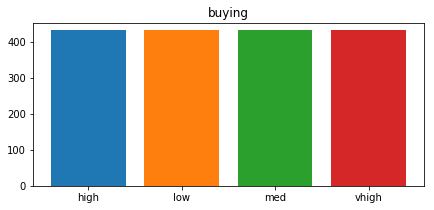

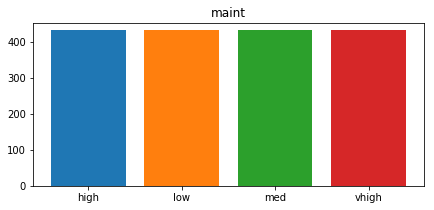

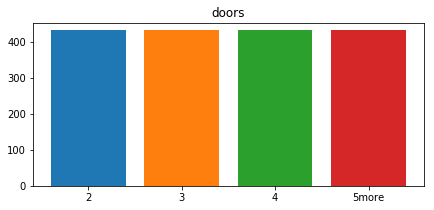

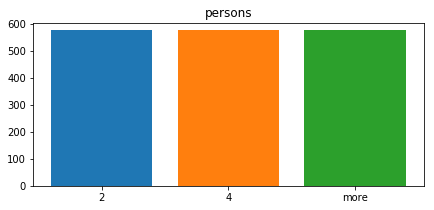

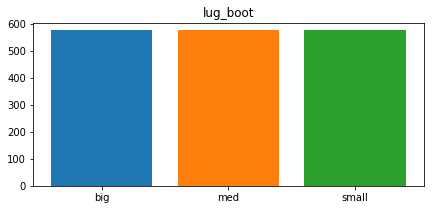

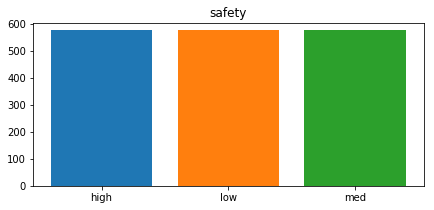

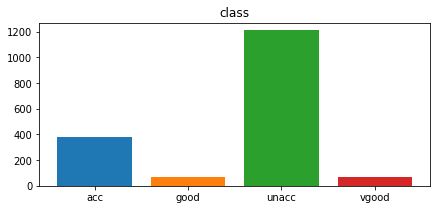

In [211]:
# 변수별 막대그래프
for var in car_raw.keys():
    plt.subplots(figsize=(7,3))
    plt.title(var)
    for i in dict(car_raw.groupby([var])[var].count()):
        plt.bar(i, dict(car_raw.groupby([var])[var].count())[i])
    plt.show()
    
# 모든 변수의 속성들이 균일하게 분포되어 있음(문제없음)

In [212]:
# 설명변수(x)와 반응변수(y) 분리
y = car_raw['class']
x = car_raw.drop(columns=['class'])

# 반응변수(y) 예측 결과를 순서대로 나타내기 위해 숫자 부여함
y[y == 'unacc'] = '1unacc'
y[y == 'acc'] = '2acc'
y[y == 'good'] = '3good'
y[y == 'vgood'] = '4vgood'


# 설명변수의 변수형이 문자형일 경우 classification이 되지 않으므로 dummy 변수를 만들어줌
# 각 dummy 변수는 0 또는 1의 값을 갖게 됨
# dummy 변수만 포함되어있는 x_dummy라는 새로운 데이터프레임 생성
x_dummy = x[:]
for var in x.keys():
    x_dummy = x_dummy.merge(pd.get_dummies(x[var], prefix=var), left_index=True, right_index=True)
    
x_dummy = x_dummy.drop(columns=x.keys())
x_dummy.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [213]:
# ZeroR
# 분류의 기준이 되는 attribute가 없고
# 가장 높은 확률의 class로 무조건 예측하여 정확도를 높임

from sklearn.dummy import DummyClassifier
zeroR = DummyClassifier(strategy='most_frequent')
zeroR.fit(x_dummy,y)
y_pred = zeroR.predict(x_dummy)

print('Accuracy:',zeroR.score(x_dummy,y))
pd.crosstab(y,y_pred)

# 예측 정확도는 약 70%이며
# 실제 class가 무엇이든 간에 모두 도수가 가장 높은 'unacc'로 예측함

Accuracy: 0.7002314814814815


col_0,1unacc
class,
1unacc,1210
2acc,384
3good,69
4vgood,65


In [224]:
# ID3

from sklearn import tree
ID3 = tree.DecisionTreeClassifier(criterion="entropy")
ID3.fit(x_dummy,y)
y_pred = ID3.predict(x_dummy)

print('Accuracy:',ID3.score(x_dummy,y))
pd.crosstab(y,y_pred, rownames=['True'], colnames=['Predicted'])

# 예측 정확도는 100%이다(과적합 가능성)

Accuracy: 1.0


Predicted,1unacc,2acc,3good,4vgood
True,,,,
1unacc,1210,0,0,0
2acc,0,384,0,0
3good,0,0,69,0
4vgood,0,0,0,65


In [229]:
# ID3 overfitting 방지1: min_samples_leaf 높게 설정
# 최소 leaf 1000개로 지정

from sklearn import tree
ID3 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=1000)
ID3.fit(x_dummy,y)
y_pred = ID3.predict(x_dummy)

print('Accuracy:',ID3.score(x_dummy,y))
pd.crosstab(y,y_pred, rownames=['True'], colnames=['Predicted'])

# min_samples_leaf를 지나치게 높게 설정하면 zeroR과 같은 결과를 얻는다(과소적합)

Accuracy: 0.7002314814814815


Predicted,1unacc
True,
1unacc,1210
2acc,384
3good,69
4vgood,65


In [231]:
# ID3 overfitting 방지1: min_samples_leaf 높게 설정
# 최소 leaf 10개로 지정

from sklearn import tree
ID3 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10)
ID3.fit(x_dummy,y)
y_pred = ID3.predict(x_dummy)

print('Accuracy:',ID3.score(x_dummy,y))
pd.crosstab(y,y_pred, rownames=['True'], colnames=['Predicted'])

# 예측 정확도는 약 95%이다

Accuracy: 0.9548611111111112


Predicted,1unacc,2acc,3good,4vgood
True,,,,
1unacc,1181,27,2,0
2acc,18,351,9,6
3good,1,6,53,9
4vgood,0,0,0,65


In [227]:
# ID3 overfitting 방지2: min_weight_fraction_leaf 높게 설정
# 각 class에서 비슷한 수의 샘플을 추출해 균형을 맞춘다
# 수가 많고 지배적인 class로 결과가 편향되는 것을 방지함
# 가지를 지나치게 많이 치는 것을 방지하는 pre-pruning

from sklearn import tree
ID3 = tree.DecisionTreeClassifier(criterion="entropy", min_weight_fraction_leaf=0.5)
ID3.fit(x_dummy,y)
y_pred = ID3.predict(x_dummy)

print('Accuracy:',ID3.score(x_dummy,y))
pd.crosstab(y,y_pred, rownames=['True'], colnames=['Predicted'])

# min_weight_fraction_leaf를 최대값인 0.5로 설정하면 zeroR과 같은 결과를 얻는다(과소적합)

Accuracy: 0.7002314814814815


Predicted,1unacc
True,
1unacc,1210
2acc,384
3good,69
4vgood,65


In [203]:
# C45


In [223]:
# NaiveBayes

from sklearn.naive_bayes import MultinomialNB
NaiveBayes = MultinomialNB()
NaiveBayes.fit(x_dummy,y)
y_pred = NaiveBayes.predict(x_dummy)

print('Accuracy:',NaiveBayes.score(x_dummy,y))
pd.crosstab(y,y_pred, rownames=['True'], colnames=['Predicted'])

# 예측 정확도는 약 87%이다

Accuracy: 0.8715277777777778


Predicted,1unacc,2acc,3good,4vgood
True,,,,
1unacc,1163,45,2,0
2acc,87,287,10,0
3good,0,46,21,2
4vgood,0,30,0,35


In [221]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(x_dummy,y)
y_pred = LogReg.predict(x_dummy)

print('Accuracy:',LogReg.score(x_dummy,y))
pd.crosstab(y,y_pred, rownames=['True'], colnames=['Predicted'])

#예측 정확도는 약 89%이다

Accuracy: 0.8912037037037037


Predicted,1unacc,2acc,3good,4vgood
True,,,,
1unacc,1162,46,2,0
2acc,47,327,10,0
3good,0,46,21,2
4vgood,0,35,0,30


In [232]:
# MLP: hidden layer 100개(default)

from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(x_dummy,y)
y_pred = MLP.predict(x_dummy)

print('Accuracy:',MLP.score(x_dummy,y))
pd.crosstab(y,y_pred, rownames=['True'], colnames=['Predicted'])

# 하나의 데이터를 제외하고 모두 알맞게 예측하였다

Accuracy: 0.9994212962962963


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicted,1unacc,2acc,3good,4vgood
True,,,,
1unacc,1210,0,0,0
2acc,0,383,1,0
3good,0,0,69,0
4vgood,0,0,0,65


In [236]:
# MLP: hidden layer 1개

from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(1,))
MLP.fit(x_dummy,y)
y_pred = MLP.predict(x_dummy)

print('Accuracy:',MLP.score(x_dummy,y))
pd.crosstab(y,y_pred, rownames=['True'], colnames=['Predicted'])

# 예측 정확도는 약 82%이다(unacc, acc으로만 예측이 이루어졌다. 과소적합)

Accuracy: 0.8234953703703703


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicted,1unacc,2acc
True,,
1unacc,1131,79
2acc,92,292
3good,3,66
4vgood,0,65


In [237]:
# MLP: hidden layer 10개

from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(10,))
MLP.fit(x_dummy,y)
y_pred = MLP.predict(x_dummy)

print('Accuracy:',MLP.score(x_dummy,y))
pd.crosstab(y,y_pred, rownames=['True'], colnames=['Predicted'])

# 예측 정확도는 약 95%이다

Accuracy: 0.9508101851851852


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicted,1unacc,2acc,3good,4vgood
True,,,,
1unacc,1173,36,1,0
2acc,15,358,9,2
3good,0,15,48,6
4vgood,0,1,0,64
